<img src="https://github.com/astro-datalab/notebooks-latest/blob/master/06_EPO/e-TeenAstronomyCafe/07_Large_Scale_Structure_of_the_Universe/Figures/logo154.svg?raw=1" alt="to Go logo" width="100" align="right"/>
<br>
<br>
<font size='6'><u><b>Large Scale Structure of the Universe</b></u></font>
<br>

This notebook is interactive, and we will use it to learn and explore the distribution of galaxies in the universe. We follow a similar approach as other notebooks you might have used.

Feel comfortable to ask questions as you go along!
___

# Table of Contents

* [How to Use This Notebook](#How-to-Use-This-Notebook)
* [Pre-Activity Setup](#Pre-Activity-Setup)
* [Activity 1: How Far Away are Galaxies?](#Activity-1:-How-Far-Away-are-Galaxies?)
    * [Part 1.1: Plot a Reference Spectrum](#Part-1.1:-Plot-a-Reference-Spectrum)
    * [Part 1.2: Plot a Galaxy Spectrum](#Part-1.2:-Plot-a-Galaxy-Spectrum)
    * [Part 1.3: Measure Redshifts](#Part-1.3:-Measure-Redshifts)
    * [Part 1.4: Mystery Galaxy](#Part-1.4:-Mystery-Galaxy)
    * [Part 1.5: Redshift Ruler](#Part-1.5:-Redshift-Ruler)
* [Activity 2: Look at the Position of Many Galaxies](#Activity-2:-Look-at-the-Position-of-Many-Galaxies)
    * [Part 2.1: Selecting Galaxies in a Region of the Sky](#Part-2.1:-Selecting-Galaxies-in-a-Region-of-the-Sky)
    * [Part 2.2: Adding the 3rd Dimension](#Part-2.2:-Adding-the-3rd-Dimension)
    * [Part 2.3: Zooming In and Zooming Out](#Part-2.3:-Zooming-In-and-Zooming-Out)
___

# How to Use This Notebook

The webpage you are in is actually an app called a Python Notebook — much like the ones on your phone. This app consists of cells.

An *input* cell looks like a light grey box with an `In [ ]:` on its left. Input cells each contain code — instructions to make the computer do something.

To activate or select a cell, click anywhere inside of it.

<div class='alert alert-info'>
    <font size='3'><b>Select the cell below and read its contents.</b></font>
</div>

In [ ]:
# Text that follows a "#" is a comment.
# Comments do not affect your code in any way.
# Always read the comments at the top of each cell you interact with.
# Comments will be used to describe what the cell's code is actually doing.

To execute or run a selected cell, click the little play button or hit `[Shift + Enter]` on your keyboard.

<div class='alert alert-info'>
    <font size='3'><b>Select the cell below and read its contents. Then, run the cell.</b></font>
        <br> If a warning appears, just click <em>"Run Anyway"</em>, this code is safe ;) 
    <br> Also, if you want to save your progress, click the <em>"Copy to Drive"</em> button at the top.
</div>

In [ ]:
# Text that DOESN'T follow a "#" is considered code.
# Lines of code are instructions given to your computer.
# The line of code below is a "print" statement.
# A print statement literally prints out the text between its quotes.

print("Congrats! You have successfully run your first cell!")

Congrats! You have successfully run your first cell!


Running a cell creates an *output* directly below it. An output can be some text, a graph, an interactive slider, or even nothing at all! When you have run a cell a number appears between the brackets, for instance [1].

You can learn more about how Python Notebooks work at https://try.jupyter.org/
___

# Pre-Activity Setup

In order for any of the activities to work properly, you must import the libraries needed for the code in this notebook.

Go to the “Runtime” menu and select the option to “Run all.” Running all helps to ensure a cell was not skipped and all libraries are imported to help the activities work properly. As you work through the Python Notebook, you may also re-run each cell individually.

<div class='alert alert-info'>
    <font size='3'><b>Select and run the cell below.</b></font>
</div>

In [ ]:
#If you are running this notebook in Colab, you should install these packages:
!pip install ipympl astroML &> /dev/null
!pip install -U matplotlib==3.1.3 &> /dev/null
print("You have successfully installed: astroML")

You have successfully installed: astroML


In [ ]:
"""Import libraries.

Here, you are importing the libraries needed for this notebook. These libraries set up the plotting environment in
your browser.
"""

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import matplotlib.cm as cm
import matplotlib.path as mpath
from mpl_toolkits.mplot3d import Axes3D

from IPython.core.display import Image, Markdown, display

from ipywidgets import *

from astroML.datasets import fetch_sdss_S82standards, fetch_sdss_specgals, fetch_sdss_spectrum, fetch_vega_spectrum
from astroML.plotting import MultiAxes

print('Done! You have successfully imported the libraries.')

Done! You have successfully imported the libraries.


___

# Activity 1: How Far Away are Galaxies?

In this activity, you will learn how astronomers measure distances to galaxies. You will get to compare galaxies to figure out which ones are closer or further away from us. You can then use this method for many more galaxies on your own as well!

As in the first notebook, we are going to use data from the [Sloan Digital Sky Survey (SDSS)](http://sdss.org). This project used a telescope at Apache Point in New Mexico to look at the northern sky.

<figure>
    <center>
        <br>
        <img src='https://apod.nasa.gov/apod/image/9806/sloan_fermilab_big.jpg', width='300'>
        <br>
        <figcaption>
            <font color='grey'>
                <b>Image 1:</b>
                The Sloan Telescope at Apache Point, New Mexico.
                <br>
                <b>Image Credit:</b>
                SDSS Team, Fermilab Visual Media Services
            </font>
        </figcaption>
    </center>
</figure>

The Sloan survey team found millions of stars and galaxies, and made their big data set public. In this activity, we will retrieve and examine galaxy data!

So how did Sloan take spectra of millions of stars and galaxies? The team used metal plates like the one shown below, with a hundreds of holes aligned with the stars and galaxies to be observed. An optical fiber is placed in each hole in order to transfer the light to the instrument and camera. As you will see below, the data are identified by their **Plate** number, their **Fiber** number, and the date when they were obtained - the **MJD** [(Modified Julian Date)](https://en.wikipedia.org/wiki/Julian_day).

<figure>
    <center>
        <br>
        <img src='http://www.nature.com/polopoly_fs/7.2192.1325671958!/image/Dark-Energy.jpg_gen/derivatives/fullsize/Dark-Energy.jpg', width='300'>
        <br>
        <figcaption>
            <font color='grey'>
                <b>Image 2:</b>
                Holes in aluminum plates let the light from stars and galaxies passed to an optical fiber to the instrument.
                <br>
                <b>Image Credit:</b>
                D. Long, SDSS-III
            </font>
        </figcaption>
    </center>
</figure>

<figure>
    <center>
        <br>
        <img src='https://www.sdss.org/press-releases/wp-content/uploads/2021/07/schlegel-fullsize.jpg', width='300'>
        <br>
        <figcaption>
            <font color='grey'>
                <b>Image 3:</b>
                David Schlegel, Principal Investigator of the BOSS survey (follow-up to SDSS), holding one fiber plug plate.
            </font>
        </figcaption>
    </center>
</figure>

There were thousands of plates used (~2500 for SDSS), each with 640 fibers, which together gives 1.6 million spectra (including galaxies, stars, and extra spectra on blank sky).
___

## Part 1.1: Plot a Reference Spectrum

A reference spectrum means that it is at redshift zero (not moving toward or away from us). In this case, the reference spectrum is that of a single star.

<div class='alert alert-info'>
    <h3 class='alert-heading'>Helpful Reminder(s)</h3>
    <ul>
        <li>Click anywhere inside of a cell to select it.</li>
        <li>Hit [Shift + Enter] to run a selected cell.</li>
    </ul>
</div>

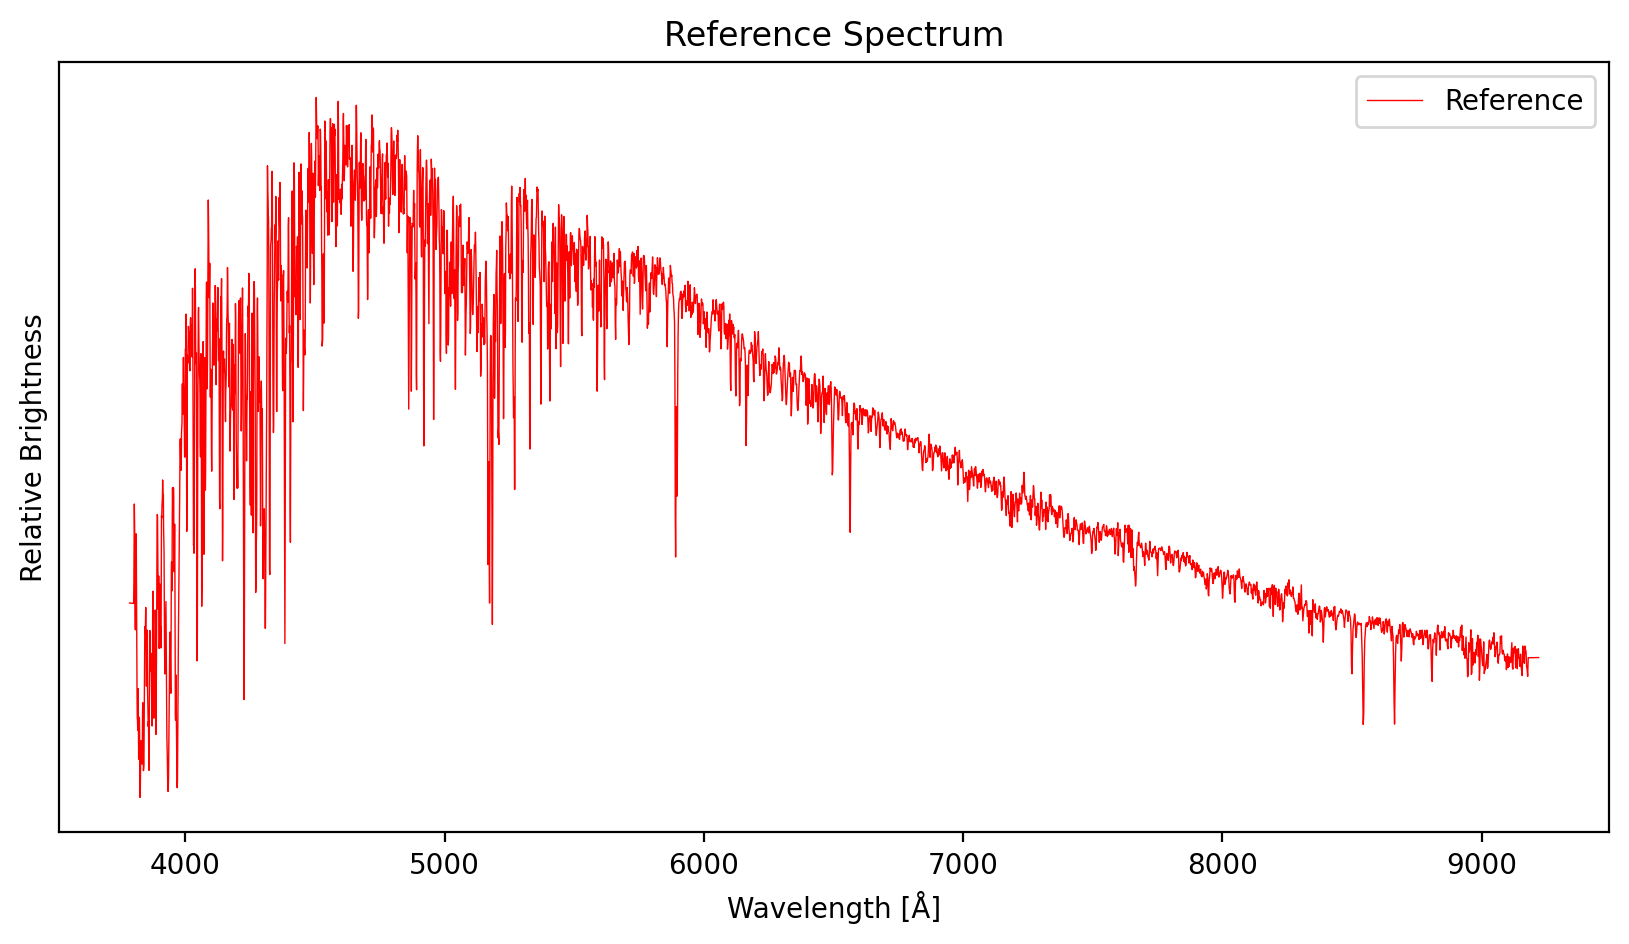

In [ ]:
"""Fetch and plot the reference spectrum.

The "Plate", "MJD", and "Fiber" numbers of the reference spectrum are entered below. They are used to gather
wavelength and brightness data. That data is then plotted on a graph.
"""

# Fetch the reference spectrum.
plate = 396
mjd = 51816
fiber = 605
spec = fetch_sdss_spectrum(plate, mjd, fiber)

# Plot the reference spectrum.
fig = plt.figure(1,figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('Reference Spectrum')
ax.set_xlabel('Wavelength [Å]')
ax.set_ylabel('Relative Brightness')
ax.set_yticks([])
ln, = ax.plot(spec.wavelength(), spec.spectrum/spec.spectrum.max(), c='red', lw=0.5, label='Reference')
ax.legend()
fig.canvas.toolbar_position = 'bottom'

def f():
    ln.set_label('Reference')
    ax.legend()

layout = {'width':'initial'}
style = {'description_width':'150px'}

___

## Part 1.2: Plot a Galaxy Spectrum

Here, you will plot the spectrum of a galaxy. Look for similarities and differences in its shape and lines relative to the reference spectrum.

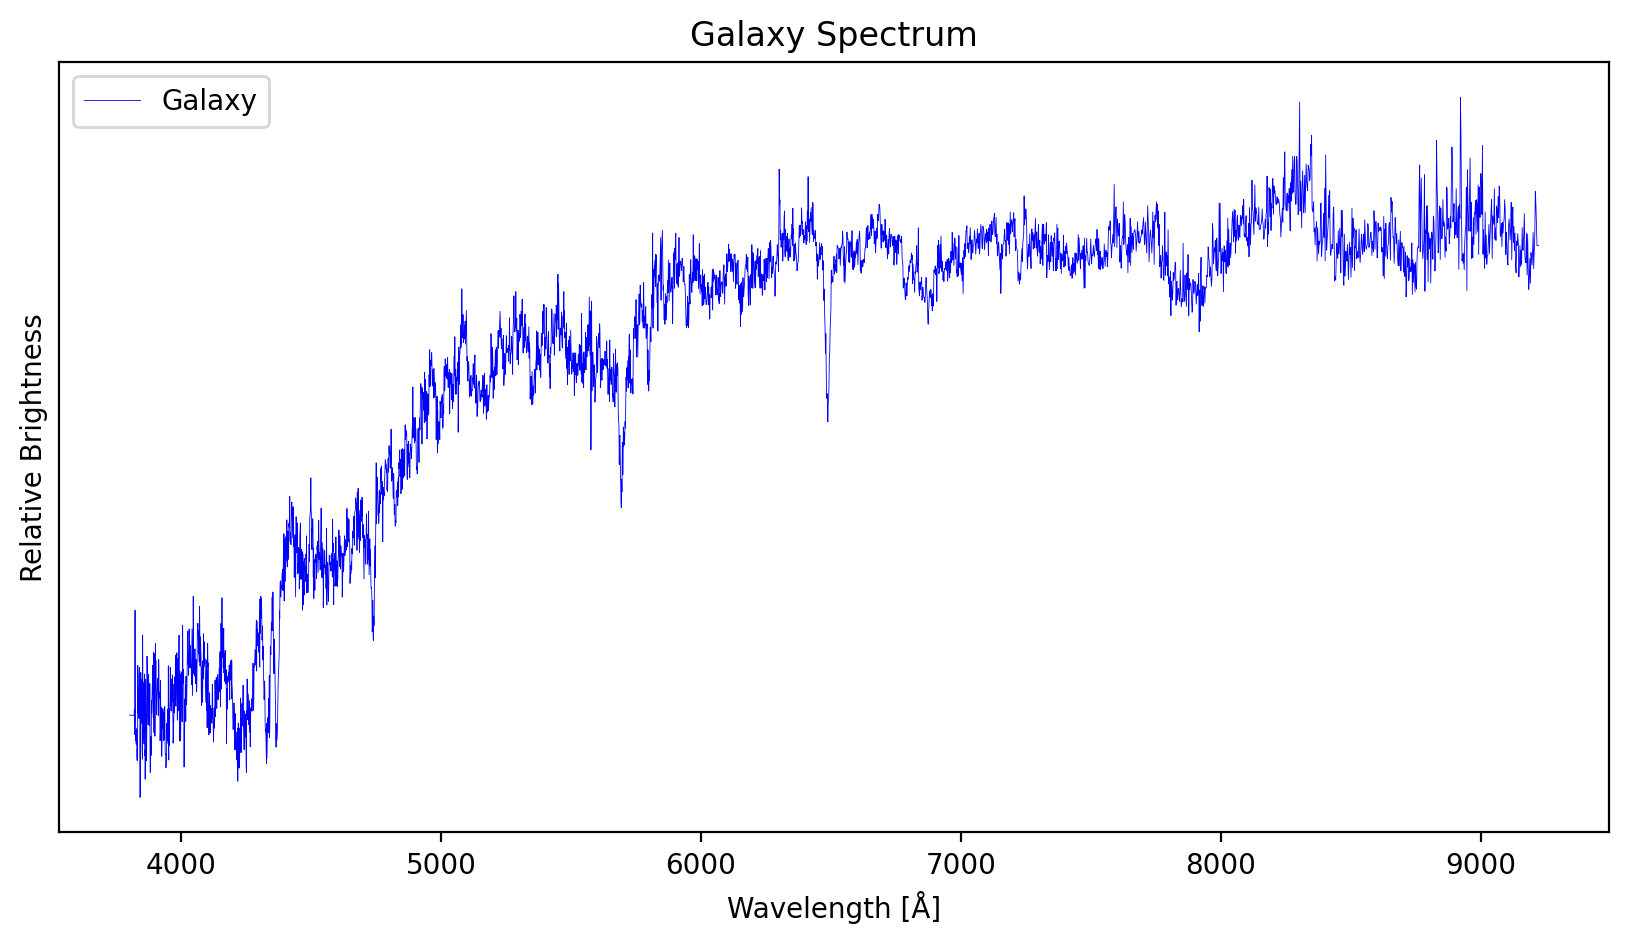

In [ ]:
"""Fetch and plot the galaxy spectrum.

The "Plate", "MJD", and "Fiber" numbers of the galaxy spectrum are entered below. They are used to gather
wavelength and brightness data. That data is then plotted on a graph.
"""

# Fetch the galaxy spectrum.
plate = 2434
mjd = 53826
fiber = 359
spec1 = fetch_sdss_spectrum(plate, mjd, fiber)

# Plot the galaxy spectrum.
fig = plt.figure(2,figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('Galaxy Spectrum')
ax.set_xlabel('Wavelength [Å]')
ax.set_ylabel('Relative Brightness')
ax.set_yticks([])
ln, = ax.plot(spec1.wavelength(), spec1.spectrum/spec1.spectrum.max(), c='blue', lw=0.3, label='Galaxy')
ax.legend()
fig.canvas.toolbar_position = 'bottom'

def f():
    ln.set_label('Galaxy')
    ax.legend()

<div class='alert alert-success'>
    <h3 class='alert-heading'>Quick Question(s)</h3>
    <ul>
        <li>Do you notice differences between the shapes two spectra?</li>
        <li>Do you notice similar patterns in the line features (dips)?</li>
    </ul>
</div>

___

## Part 1.3: Measure Redshifts

The next step here is to overlay a reference spectrum (called a template) onto the galaxy spectra from above.

> <u><b>Remember:</b></u> A galaxy is a collection of billion of stars, so the shape of the spectrum is not identical to the reference spectrum of a single star. But because the stars have the same elements, notice similar "dips" in the spectra.

In [ ]:
"""Plot the reference and galaxy spectra.

The reference and galaxy spectra are plotted side by side. They can be compared analytically so that the galaxy
spectrum's redshift value can be determined.
"""
# Create the interactive widget.
def f(w3, w4):
    # Plot the reference and galaxy spectra.
    fig = plt.figure(3,figsize=(10,5))
    ax = fig.add_subplot(111)
    ax.set_title('Reference vs. Galaxy Spectra')
    ax.set_xlabel('Wavelength [Å]')
    ax.set_ylabel('Relative Brightness')
    ax.set_yticks([])
    ax.set_xlim(3700,7700)
    fig.canvas.toolbar_position = 'bottom'

    ln1, = ax.plot(spec.wavelength(), spec.spectrum/spec.spectrum.max(), c='red', lw=0.4, label='Reference')
    ln2, = ax.plot(spec1.wavelength(), spec1.spectrum/spec1.spectrum.max(), c='blue', lw=0.4, label='Galaxy')

    ln1.set_xdata(spec.wavelength() * (1 + w3))
    ln1.set_ydata(spec.spectrum/spec.spectrum.max() + w4)
    ax.legend()
    plt.show()
    
box_layout = {'display':'flex', 'flex_flow':'column', 'border':'1px solid grey', 'width':'initial'}
w3 = FloatSlider(description='Redshift:', value=0, min=0, max=0.2, step=0.01, layout=layout, style=style)
w4 = FloatSlider(description='Vertical Separation:', value=0, min=-1, max=1, step=0.02, layout=layout, style=style)

plot = interactive(f, w3=w3, w4=w4)
plot.layout = box_layout
display(plot)

interactive(children=(FloatSlider(value=0.0, description='Redshift:', layout=Layout(width='initial'), max=0.2,…

<div class='alert alert-success'>
    <h3 class='alert-heading'>Quick Question(s)</h3>
    <ul>
        <li>Do you notice how the galaxy spectrum is shifted with respect to the reference spectrum?</li>
    </ul>
</div>

This is what we saw as the **redshift** due to the expansion of the universe, which causes galaxies to appear to recede away from us.
___

## Part 1.4: Mystery Galaxy

The next step adds four new mystery galaxies to analyze. As with the one before, find the redshift of each of the four mystery galaxies. Compare your answers with the person next to you.

In [ ]:
"""Plot the reference and mystery galaxy spectra.

Various mystery galaxy spectra are plotted next to the reference to showcase a variety of redshifts.
"""
plt.close()
# Fetch the mystery galaxy spectrum.
plate = 2121
mjd = 54180
fiber = 414
spec2 = fetch_sdss_spectrum(plate, mjd, fiber)

# Create the interactive widget.
def f(w3, w4, w6):
    global spec2
    fig = plt.figure(4, figsize=(10,5))
    ax = fig.add_subplot(111)
    ax.set_title('Reference vs. Mystery Galaxy 1 Spectra')
    ax.set_xlabel('Wavelength [Å]')
    ax.set_ylabel('Relative Brightness')
    ax.set_yticks([])
    ax.set_xlim(3700,7700)
    ln1, = ax.plot(spec.wavelength(), spec.spectrum/spec.spectrum.max(), c='red', lw=0.5, label='Reference')
    ln2, = ax.plot(spec2.wavelength(), spec2.spectrum/spec2.spectrum.max(), c='blue', lw=0.5, label='Galaxy')
    fig.canvas.toolbar_position = 'bottom'

    if w6 == 'Mystery Galaxy 1':
        plate = 2121
        mjd = 54180
        fiber = 414
        ax.set_title('Reference vs. Mystery Galaxy 1 Spectra')
    if w6 == 'Mystery Galaxy 2':
        plate = 1759
        mjd = 53081
        fiber = 126
        ax.set_title('Reference vs. Mystery Galaxy 2 Spectra')
    if w6 == 'Mystery Galaxy 3':
        plate = 1839
        mjd = 53471
        fiber = 310
        ax.set_title('Reference vs. Mystery Galaxy 3 Spectra')
    if w6 == 'Mystery Galaxy 4':
        plate = 2121
        mjd = 54180
        fiber = 523
        ax.set_title('Reference vs. Mystery Galaxy 4 Spectra')
    spec2 = fetch_sdss_spectrum(plate, mjd, fiber)
    ln2.set_xdata(spec2.wavelength())
    ln2.set_ydata(spec2.spectrum/spec2.spectrum.max())
    ln1.set_xdata(spec.wavelength() * (1 + w3))
    ln1.set_ydata(spec.spectrum/spec.spectrum.max() + w4)
    ln1.set_label('Reference')
    ln2.set_label('Galaxy')
    ax.legend()
    plt.show()

w3 = FloatSlider(description='Redshift:', value=0, min=0, max=0.2, step=0.01, layout=layout, style=style)
w4 = FloatSlider(description='Vertical Separation:', value=0, min=-1, max=1, step=0.02, layout=layout, style=style)
galaxies = ['Mystery Galaxy 1', 'Mystery Galaxy 2', 'Mystery Galaxy 3', 'Mystery Galaxy 4']
w6 = ToggleButtons(description='Mystery Galaxy:', options=galaxies, layout=layout, style=style)
plot = interactive(f, w3=w3, w4=w4, w6=w6)
plot.layout = box_layout
display(plot)

interactive(children=(FloatSlider(value=0.0, description='Redshift:', layout=Layout(width='initial'), max=0.2,…

<div class='alert alert-warning'>
    <h3 class='alert-heading'>Discussion Question(s)</h3>
    <ul>
        <li>Which galaxy is closer to us and why?</li>
    </ul>
</div>

Now, let's check the redshift and learn more information about these galaxies. [Click this link.](http://cas.sdss.org/dr14/en/tools/explore/Summary.aspx) Click "Search" on the left hand side menu bar, and then enter the **Plate**, **Fiber** and **MJD** for any one of the mystery galaxies above (find these in the code), and hit "Go". If you click on the image, you can move around, zoom in and out - it's like Google Maps for the night sky!
___

## What's next?

Well done! You have measured redshifts for two galaxies, which is how astronomers determine distances to galaxies. Remember, the further away a galaxy is from us, the faster is seems to be moving away from us, and the more its light (spectrum) is redshifted! That's because the universe is expanding.

Next, let's see what we can learn if we apply this information to many galaxies. Onward to exploring our vast universe!
___

# Activity 2: Look at the Position of Many Galaxies

Similarly to using coordinates of latitude and longitude, the coordinates on the sky are defined onto a sphere. They are called **RA** (Right Ascension) and **Dec** (Declination). There are two illustrations below of these coordinate systems.

<figure>
    <center>
        <br>
        <img src='http://voyages.sdss.org/wp-content/uploads/2015/10/pre-flight-celestial-sphere.jpg', width='300'>
        <br>
        <figcaption>
            <font color='grey'>
                <b>Figure 4:</b>
                Illustration of the celestial coordinate system with RA and Dec. You can read <a href='http://dev.skyserver.sdss3.org/voyages/pre-flight/ra-and-dec.aspx'>here</a> for an explanation by the SDSS team.
            </font>
        </figcaption>
    </center>
</figure>

<figure>
    <center>
        <br>
        <img src='https://upload.wikimedia.org/wikipedia/commons/9/98/Ra_and_dec_on_celestial_sphere.png', width='300'>
        <br>
        <figcaption>
            <font color='grey'>
                <b>Figure 5:</b>
                Illustration of the celestial coordinate system with RA and Dec. You can read on Wikipedia about <a href='https://en.wikipedia.org/wiki/Right_ascension'>Right Ascension</a> and <a href='https://en.wikipedia.org/wiki/Declination'>Declination</a>.
            </font>
        </figcaption>
    </center>
</figure>

___

## Part 2.1: Selecting Galaxies in a Region of the Sky

Next, we will fetch the positions of galaxies on the sky, and plot their RA and Dec coordinates. Run the cells below to actually fetch the galaxy sample and plot their positions on the sky.

<div class='alert alert-info'>
    <h3 class='alert-heading'>Helpful Reminder(s)</h3>
    <ul>
        <li>Click anywhere inside of a cell to select it.</li>
        <li>Hit [Shift + Enter] to run a selected cell.</li>
    </ul>
</div>

Done retrieving the galaxy sample.

Range for RA values: 0.0    360.0
Range for Dec values: -11.0    70.0
Range for RA values after conversion: -180.0    180.0


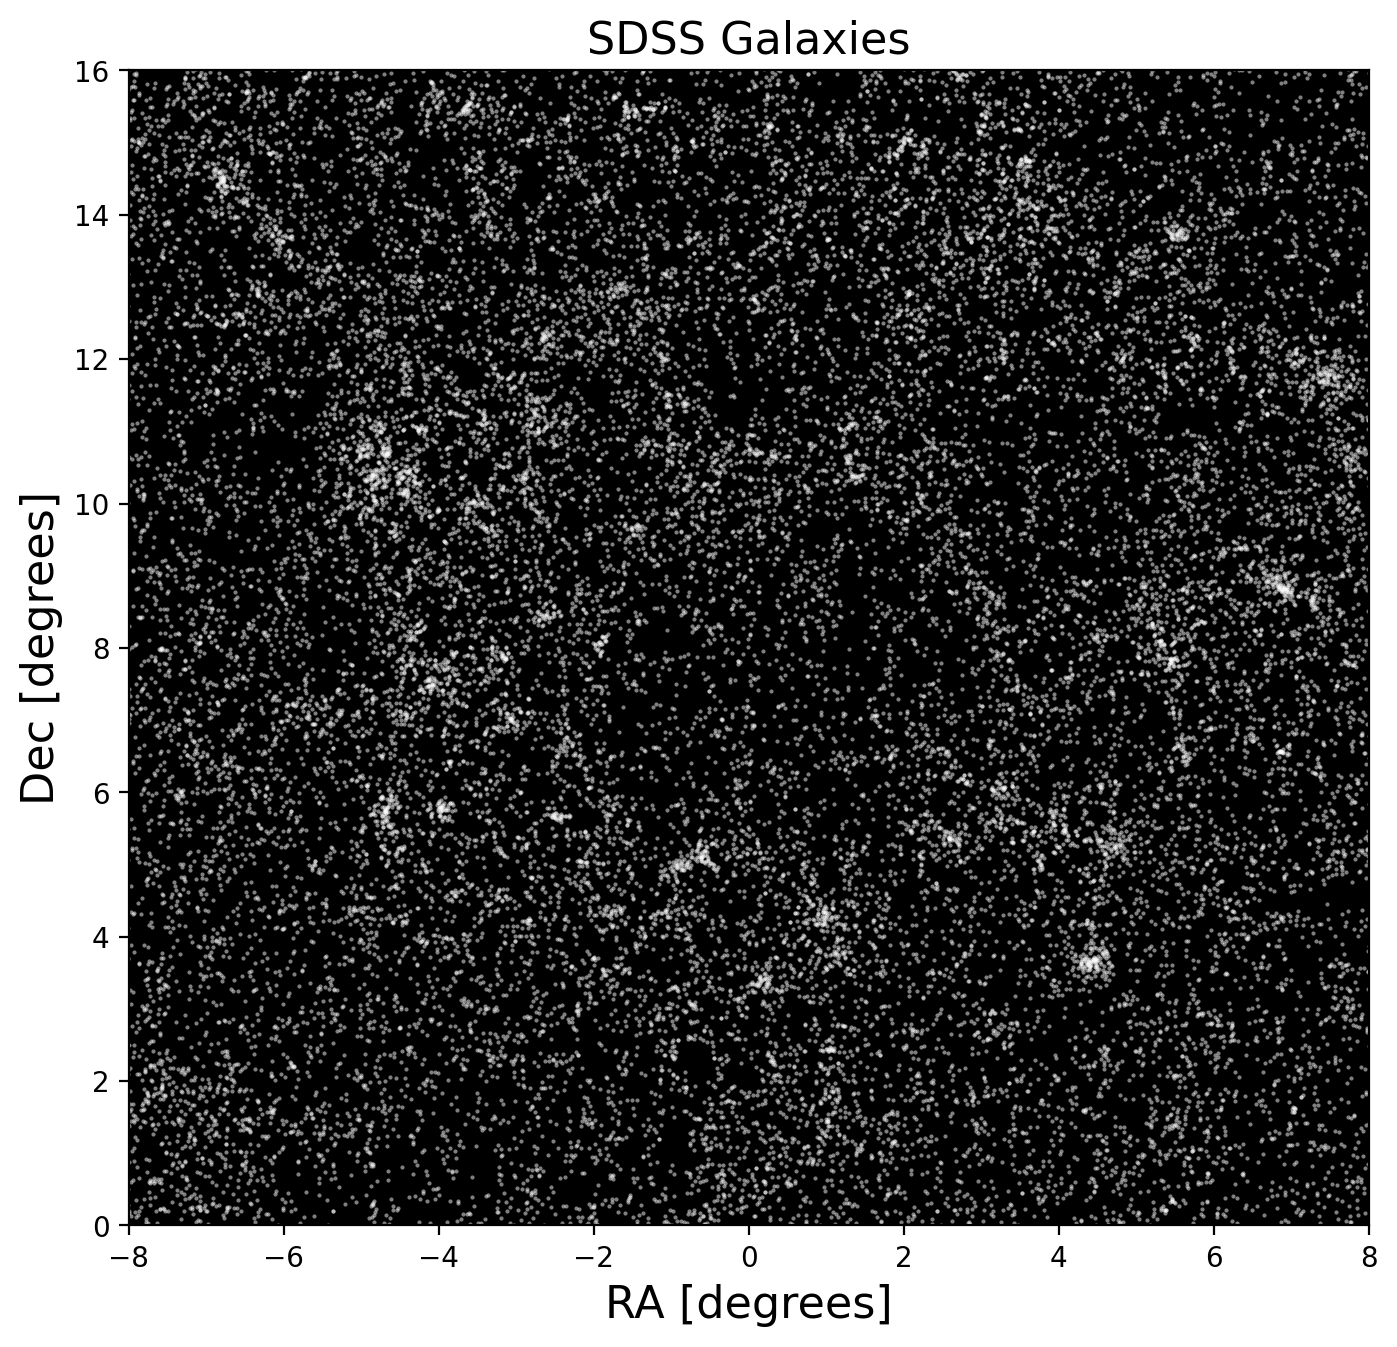

In [ ]:
"""Fetch and plot a section of the sky from the SDSS data."""
# close previous instance to save memory
plt.close()
# Fetch the SDSS sata.
data = fetch_sdss_specgals()
print('Done retrieving the galaxy sample.\n')

# Define the coordinate variables for plotting.
RA = data['ra']
DEC = data['dec']
print('Range for RA values: %s    %s' %(np.round(np.amin(RA)),np.round(np.amax(RA))))
print('Range for Dec values: %s    %s' %(np.round(np.amin(DEC)),np.round(np.amax(DEC))))

# Convert RA range to [-180, 180] instead of [0, 360].
RA -= 180
print('Range for RA values after conversion: %s    %s' %(np.round(np.amin(RA)),np.round(np.amax(RA))))

# Plot the RA/DEC positions.
fig = plt.figure(figsize=(8,7.5))
ax = fig.add_subplot(111, fc='black')
ax.set_title('SDSS Galaxies',fontsize=16)
ax.set_xlabel('RA [degrees]',fontsize=16)
ax.set_ylabel('Dec [degrees]',fontsize=16)
ax.set_xlim(-8, 8)  # Range for the x axis (horizontal)
ax.set_ylim(0, 16)  # Range for the y axis (vertical)
ln, = ax.plot(RA, DEC, c='white', marker='.', ms=1, ls='', alpha=0.5)
fig.canvas.toolbar_position = 'bottom'

___

## Part 2.2: Adding the 3rd Dimension

We saw before that in order to know the full distribution in 3D, we need to know how far away the galaxies are located. Here, we will add the information from the redshift.

> <u><b>Remember:</b></u> The larger the redshift, the further away the galaxy!

First, we will plot all galaxies in white, and show galaxies that have approximately the same redshift in yellow. In this first example, we will select for values of redshift with a slider widget. This is done by computing galaxies in a window of $\pm 0.01$ around the value of the redshift slider. We call this an interval of redshift.

In [ ]:
"""Highlight distant galaxies based on redshift."""
# close previous instance to save memory
plt.close()
# Fetch the SDSS data.
data = fetch_sdss_specgals()
print('Done retrieving the galaxy sample.\n')

# Define the coordinate variables for plotting.
RA = data['ra']
DEC = data['dec']

# Convert RA range to [-180, 180] instead of [0, 360].
RA -= 180

# Define redshift variable z.
z = data['z']

# Select a redshift range to highlight.
rz = np.where(np.absolute(z) < 0.01)

# Create the interactive widget.
def f(w3):
    global rz
    # Plot the RA/DEC positions.
    fig = plt.figure(figsize=(8,7.5))
    ax = fig.add_subplot(111, fc='black')
    ax.set_title('SDSS Galaxies',fontsize=16)
    ax.set_xlabel('RA [degrees]',fontsize=16)
    ax.set_ylabel('Dec [degrees]',fontsize=16)
    ax.set_xlim(-8, 8)  # Range for the x axis (horizontal)
    ax.set_ylim(0, 16)  # Range for the y axis (vertical)
    ln1, = ax.plot(RA, DEC, c='white', marker='.', ms=1, ls='', alpha=0.5)
    ln2, = ax.plot(RA[rz], DEC[rz], c='yellow', marker='.', ms=3, ls='', alpha=1)  # rz selected galaxies
    fig.canvas.toolbar_position = 'bottom'

    rz = np.where(np.absolute(z-w3) < 0.01)
    ln2.set_data([RA[rz], DEC[rz]])
    plt.show()

w3 = FloatSlider(description='Redshift:', value=0, min=0.02, max=0.2, step=0.01, layout=layout, style=style)
plot = interactive(f, w3=w3)
plot.layout = box_layout
display(plot)

Done retrieving the galaxy sample.



interactive(children=(FloatSlider(value=0.02, description='Redshift:', layout=Layout(width='initial'), max=0.2…

Now, instead of showing just one interval of redshift in yellow, we will show the redshift of each galaxy color-coded. Each galaxy is shown with a dot, and each dot will have a color corresponding to the redshift: purple/blue colors mean a low redshift like between $0$ and $0.05$, then green/yellow mean slightly higher redshift like $0.1$, and so on until the higher redshift shown here of $0.2$ in red. Remember that this means that points with exactly the same color are at the same distance from us!

In [ ]:
"""Color-code distant galaxies based on redshift."""

# Fetch the SDSS data.
data = fetch_sdss_specgals()

# Define the coordinate variables for plotting.
RA = data['ra']
DEC = data['dec']

# Convert RA range to [-180, 180] instead of [0, 360].
RA -= 180

# Define redshift variable z.
z = data['z']

# Plot the RA/DEC positions.
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, fc='black')
ax.set_title('SDSS Galaxies (Color-Coded by Redshift)',fontsize=16)
ax.set_xlabel('RA [degrees]',fontsize=16)
ax.set_ylabel('Dec [degrees]',fontsize=16)
ax.set_xlim(-8, 8)
ax.set_ylim(0, 16)
# Overplot a rectangle with the smallest region (zoomed in)
ax.plot([-2, -2, 2, 2], [0, 4, 4, 0], color='white', ls='--', lw=1)
ln = ax.scatter(RA, DEC, s=2, c=z, lw=0, cmap=cm.rainbow, vmin=0, vmax=0.2)
fig.colorbar(ln)  # Color bar
fig.canvas.toolbar_position = 'bottom'

# Count how many galaxies are within the plot.
points = np.column_stack([RA, DEC])
verts = np.array([[-8, -8, 8, 8], [0, 16, 16, 0]]).T
path = mpath.Path(verts)
points_inside = points[path.contains_points(points)]
print('--------------------------------------------')
print('  Number of galaxies in the figure: %s' %np.count_nonzero(points_inside))
print('--------------------------------------------')

--------------------------------------------
  Number of galaxies in the figure: 48148
--------------------------------------------


The color bar to the right-hand side shows the correspondence between color and redshift. As mentioned before, points with exactly the same color are at the same distance from us. Purple points are the closest to us, then blue, aqua, green and so on. Think about which galaxies/colors are near and which galaxies/colors are far.

<div class='alert alert-success'>
    <h3 class='alert-heading'>Quick Question(s)</h3>
    <ul>
        <li>Can you use this information to imagine the distribution of galaxies in 3D?</li>
        <li>Do you notice any structure together at the same distance from us?</li>
    </ul>
</div>

___

## Part 2.3: Zooming In and Zooming Out

Now, we will repeat the plots from Part 2.2 above, but with a zoom on a smaller region ("zooming in"), and then over a larger region ("zooming out").

In [ ]:
"""Color-code distant galaxies based on redshift (zoomed-in)."""
# close previous instance to save memory
plt.close()
# Fetch the SDSS data.
data = fetch_sdss_specgals()

# Define the coordinate variables for plotting.
RA = data['ra']
DEC = data['dec']

# Convert RA range to [-180, 180] instead of [0, 360].
RA -= 180

# Define redshift variable z.
z = data['z']

# Plot the RA/DEC positions.
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, fc='black')
ax.set_title('SDSS Galaxies (Color-Coded by Redshift)',fontsize=16)
ax.set_xlabel('RA [degrees]',fontsize=16)
ax.set_ylabel('DEC [degrees]',fontsize=16)
ax.set_xlim(-2, 2)
ax.set_ylim(0, 4)
ln = ax.scatter(RA, DEC, s=5, c=z, lw=0, cmap=cm.rainbow, vmin=0, vmax=0.2)
fig.colorbar(ln)  # Color bar
fig.canvas.toolbar_position = 'bottom'

# Count how many galaxies are within the plot.
points = np.column_stack([RA, DEC])
verts = np.array([[-2, -2, 2, 2], [0, 4, 4, 0]]).T
path = mpath.Path(verts)
points_inside = points[path.contains_points(points)]
print('--------------------------------------------')
print('  Number of galaxies in the figure: %s' %np.count_nonzero(points_inside))
print('--------------------------------------------')

<div class='alert alert-success'>
    <h3 class='alert-heading'>Quick Question(s)</h3>
    <ul>
        <li>Do you see any interesting galaxy structures?</li>
        <li>What galaxy structures are closer/further from you?</li>
    </ul>
</div>

Now, let's step back and plot galaxies over a large region of the sky!

--------------------------------------------
Number of galaxies in the figure: 170274
--------------------------------------------


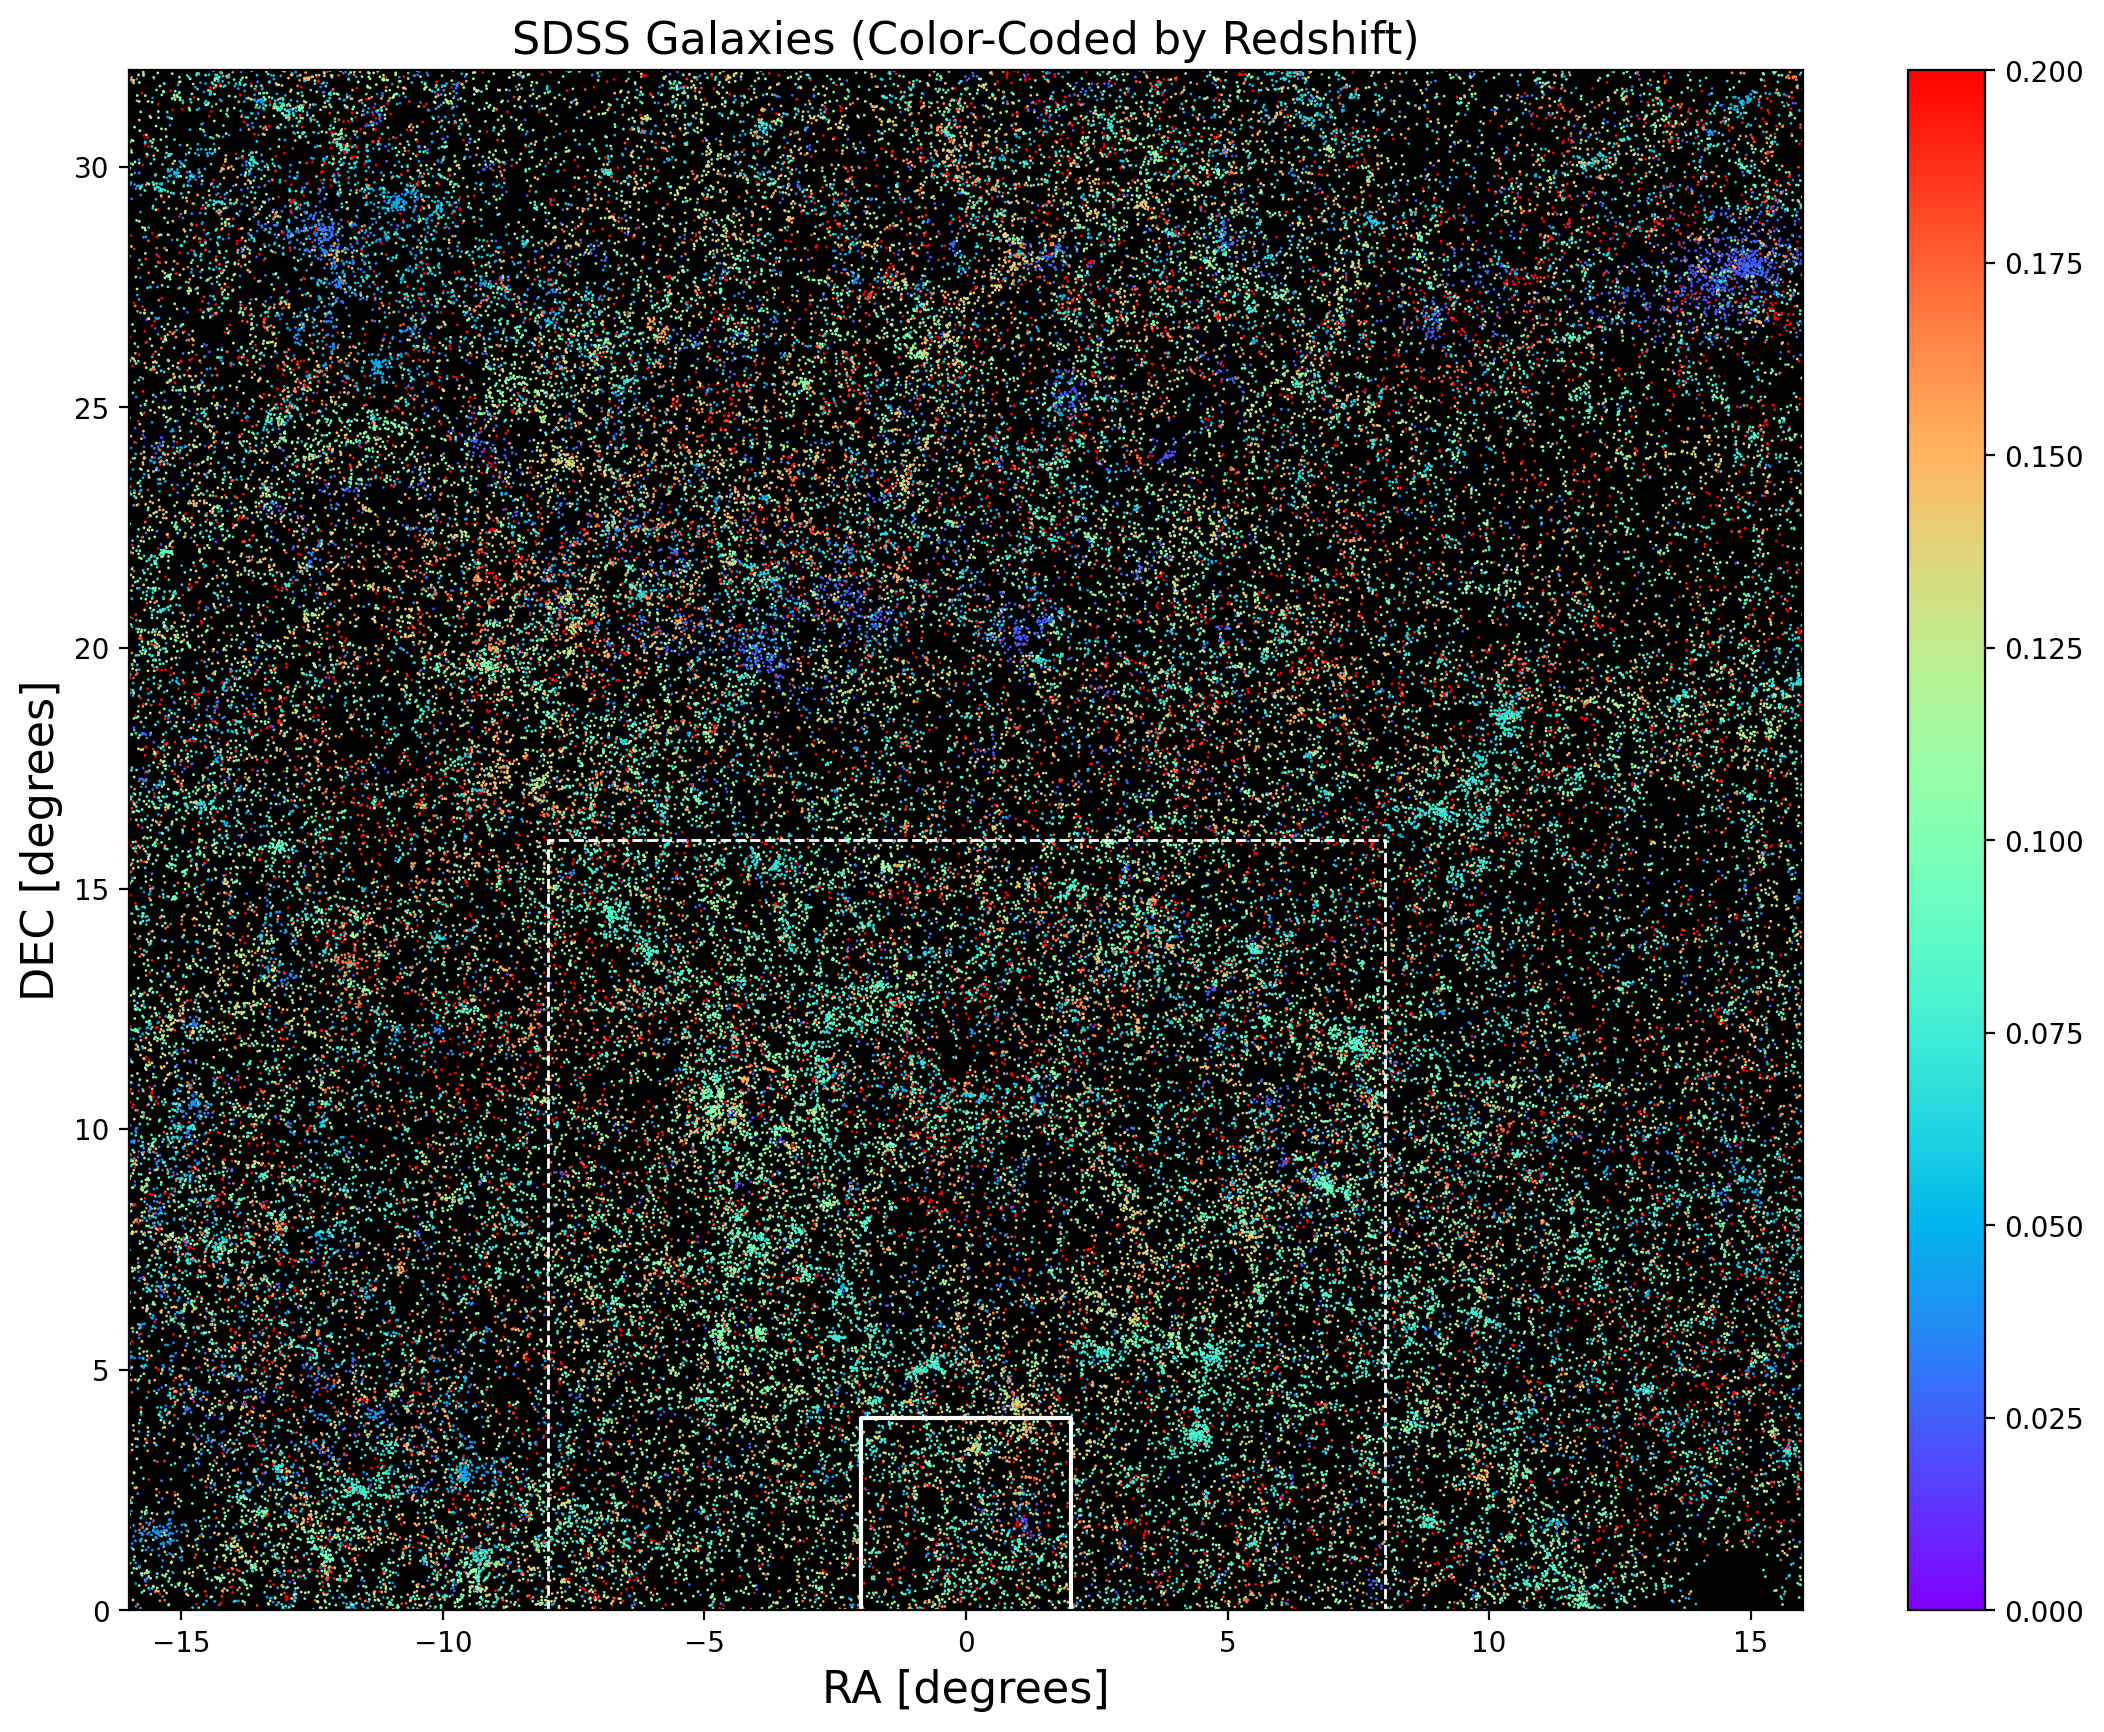

In [ ]:
"""Color-code distant galaxies based on redshift (zoomed-out)."""
# close previous instance to save memory
plt.close()
# Fetch the SDSS data.
data = fetch_sdss_specgals()

# Define the coordinate variables for plotting.
RA = data['ra']
DEC = data['dec']

# Convert RA range to [-180, 180] instead of [0, 360].
RA -= 180

# Define redshift variable z.
z = data['z']

# Plot the RA/DEC positions.
fig = plt.figure(figsize=(13.5,10))
ax = fig.add_subplot(111, fc='black')
ax.set_title('SDSS Galaxies (Color-Coded by Redshift)', fontsize=16)
ax.set_xlabel('RA [degrees]', fontsize=16)
ax.set_ylabel('DEC [degrees]', fontsize=16)
ax.set_xlim(-16, 16)
ax.set_ylim(0, 32)
# Overplot a rectangle with the first region
ax.plot([-8, -8, 8, 8], [0, 16, 16, 0], color='white', ls='--', lw=1)
# Overplot a rectangle with the smallest region (zoomed in)
ax.plot([-2, -2, 2, 2], [0, 4, 4, 0], color='white')
ln = ax.scatter(RA, DEC, s=1, c=z, lw=0, cmap=cm.rainbow, vmin=0, vmax=0.2)
fig.colorbar(ln)  # Color bar
fig.canvas.toolbar_position = 'bottom'

# Count how many galaxies are within the plot.
points = np.column_stack([RA, DEC])
verts = np.array([[-16, -16, 16, 16], [0, 32, 32, 0]]).T
path = mpath.Path(verts)
points_inside = points[path.contains_points(points)]
print('--------------------------------------------')
print('Number of galaxies in the figure: %s' %np.count_nonzero(points_inside))
print('--------------------------------------------')

<div class='alert alert-danger'>
    <h3 class='alert-heading'>Concluding Question(s)</h3>
    <ol>
        <li>How many times more galaxies are in the large (zoomed out) view relative to the small (zoomed in) view?</li>
        <li>How many times can you fit the small region within the large region? (Hint: compute the size from the axes)</li>
        <li>Are those two numbers above the same? What does it mean?</li>
        <li>What do you see now on the zoomed out view?</li>
        <li>Are those structures smaller or larger?</li>
    </ol>
</div>

___

In [ ]:
# Cell for calulations (fill in numbers below otherwise it will not execute well!)

#1 How many times more galaxies are there in the large region compared to the small region?
# BELOW: REPLACE THE '1's WITH THE CORRECT NUMBERS
Number_in_largest_region = 1
Number_in_smallest_region = 1
ratio = Number_in_largest_region / Number_in_smallest_region
print('Ratio of number of galaxies:', ratio)

#2 How many times can the small region fit within the large region? (hint: large region is 32 degrees on a side)
# BELOW: REPLACE THE '1's WITH THE CORRECT NUMBERS
area_of_largest_region = 1
area_of_smallest_region = 1
ratio = area_of_largest_region / area_of_smallest_region
print('Ratio of areas on the sky:', ratio)

Ratio of number of galaxies: 1.0
Ratio of areas on the sky: 1.0


##### Written by Stephanie Juneau (NOIRLab), Leah Fulmer, Andres Jaramillo, Gautham Narayan & Juan-David Vargas (last updated on 03/18/2022)
